In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import arviz as az
import graphviz
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

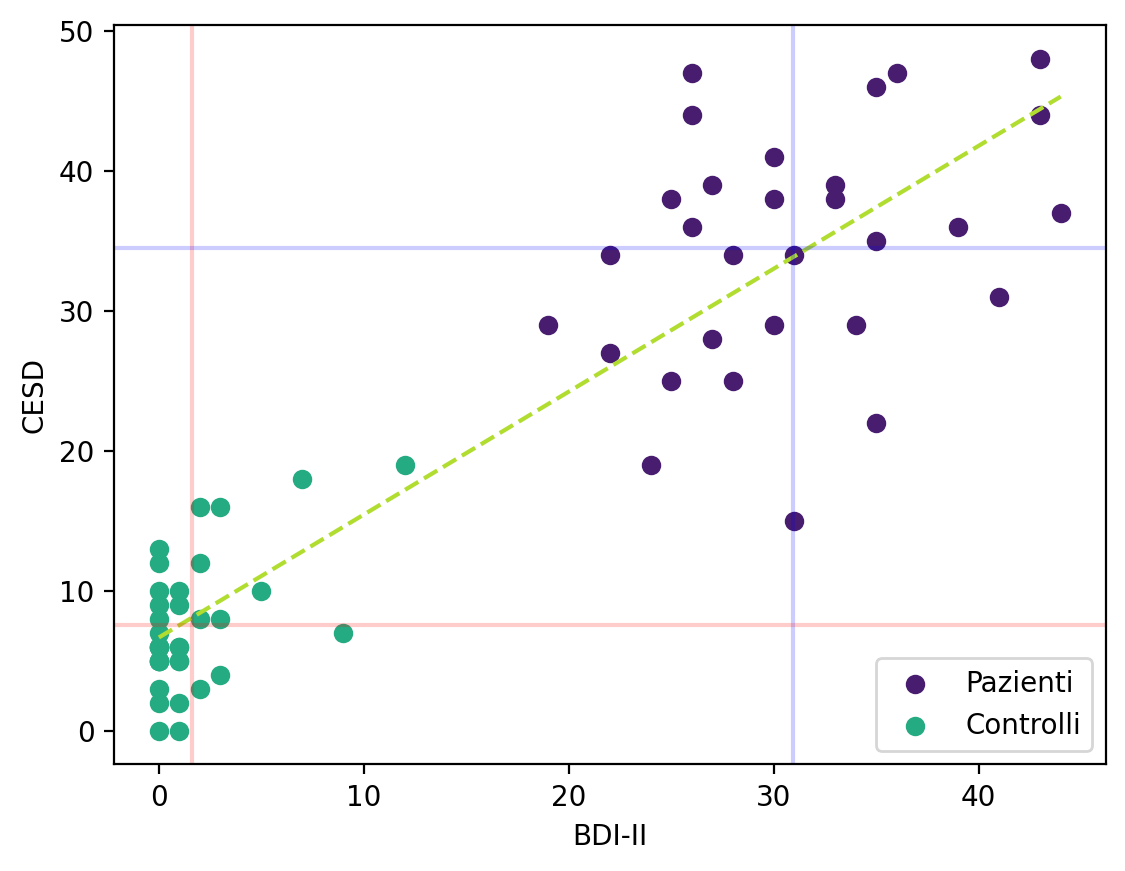

In [3]:
# Leggi i dati dal file CSV
df = pd.read_csv("../data/data.mood.csv", index_col=0)

# Seleziona le colonne di interesse
df = df[["esm_id", "group", "bdi", "cesd_sum"]]

# Rimuovi le righe duplicate
df = df.drop_duplicates(keep="first")

# Rimuovi le righe con valori mancanti nella colonna "bdi"
df = df.dropna(subset=["bdi"])

# Crea uno scatterplot con colori diversi per i due gruppi
plt.scatter(df[df["group"] == "mdd"]["bdi"], df[df["group"] == "mdd"]["cesd_sum"], label="Pazienti", c="C0")
plt.scatter(df[df["group"] == "ctl"]["bdi"], df[df["group"] == "ctl"]["cesd_sum"], label="Controlli", c="C2")

# Calcola i coefficienti della retta dei minimi quadrati
coeff_combined = np.polyfit(df["bdi"], df["cesd_sum"], 1)

# Calcola la retta dei minimi quadrati
line_combined = np.poly1d(coeff_combined)

# Disegna la retta dei minimi quadrati
x_values = np.linspace(df["bdi"].min(), df["bdi"].max(), 100)
plt.plot(x_values, line_combined(x_values), linestyle='--', color='C3')

# Etichette degli assi
plt.xlabel("BDI-II")
plt.ylabel("CESD")

# Linee verticali ed orizzontali per le medie
plt.axvline(np.mean(df[df["group"] == "mdd"]["bdi"]), alpha=0.2, color="blue")
plt.axvline(np.mean(df[df["group"] == "ctl"]["bdi"]), alpha=0.2, color="red")
plt.axhline(np.mean(df[df["group"] == "mdd"]["cesd_sum"]), alpha=0.2, color="blue")
plt.axhline(np.mean(df[df["group"] == "ctl"]["cesd_sum"]), alpha=0.2, color="red")

# Legenda
plt.legend()

# Mostra il grafico
plt.show()

In [4]:
def cov_value(x, y):

    mean_x = sum(x) / float(len(x))
    mean_y = sum(y) / float(len(y))

    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]

    sum_value = sum([sub_y[i] * sub_x[i] for i in range(len(x))])
    denom = float(len(x))

    cov = sum_value / denom
    return cov

In [5]:
x = df["bdi"]
y = df["cesd_sum"]

cov_value(x, y)

207.42653810835637

In [6]:
np.mean((x - np.mean(x)) * (y - np.mean(y)))

207.42653810835628

In [7]:
np.cov(x, y, ddof=0)

array([[236.23875115, 207.42653811],
       [207.42653811, 222.83379247]])

In [8]:
np.corrcoef(x, y)

array([[1.        , 0.90406202],
       [0.90406202, 1.        ]])

In [9]:
s_xy = np.mean((x - np.mean(x)) * (y - np.mean(y)))
s_x = x.std(ddof=0)
s_y = y.std(ddof=0)
r_xy = s_xy / (s_x * s_y)
print(r_xy)

0.9040620189474861


In [10]:
z_x = (x - np.mean(x)) / np.std(x, ddof=0)
z_y = (y - np.mean(y)) / np.std(y, ddof=0)
np.mean(z_x * z_y)

0.9040620189474862

In [11]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Sep 21 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

pandas    : 1.5.3
numpy     : 1.23.5
seaborn   : 0.12.2
graphviz  : 0.20.1
matplotlib: 3.7.1
arviz     : 0.15.1
scipy     : 1.10.1

Watermark: 2.4.3

